In [ ]:
# ******* True running program *******

# Generate the augmentated images and its corresponding bbox coordinates, and write everything in an Excel file.
# This is notebook is for training set.
# This notebook is for Hrizontal Flip

### Import necessary packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pydicom as dicom
from PIL import Image, ImageMath
import cv2 
import skimage.color
import os
import random
import pandas as pd
from data_aug.data_aug import *
from data_aug.bbox_util import *
import pickle as pkl

### Preprocessing

In [17]:
# Original images path and their cooresponding bbox coordinates.

file_path = r'D:\Studying\RetinaNet_Project_csv\csv_files_for_my_onw_pc\original_data_set\training_set\training_set_only_mass.xlsx'
data_frame = pd.read_excel(file_path)
image_path_dataframe = data_frame['image_path']
print(image_path_dataframe)
# List for storing all image path
image_path_list = np.array(image_path_dataframe).tolist()
# List for storing their corresponding bounding boxes coordinates
bbox_coordinates_dataframe = pd.read_excel(file_path, usecols=[1,2,3,4], names=None)
print(bbox_coordinates_dataframe)
bbox_coordinates_array = np.array(bbox_coordinates_dataframe)
bbox_coordinates_array = np.float64(bbox_coordinates_array)
# print(bbox_coordinates_array)
bbox_coordinates_array_temp = np.float64(np.zeros([107,5]))
bbox_coordinates_array_temp[:,0:4] = bbox_coordinates_array
bbox_coordinates_array = bbox_coordinates_array_temp
print(bbox_coordinates_array)

0      D:\Studying\RetinaNet_Project\all_DICOM_files\...
1      D:\Studying\RetinaNet_Project\all_DICOM_files\...
2      D:\Studying\RetinaNet_Project\all_DICOM_files\...
3      D:\Studying\RetinaNet_Project\all_DICOM_files\...
4      D:\Studying\RetinaNet_Project\all_DICOM_files\...
                             ...                        
102    D:\Studying\RetinaNet_Project\all_DICOM_files\...
103    D:\Studying\RetinaNet_Project\all_DICOM_files\...
104    D:\Studying\RetinaNet_Project\all_DICOM_files\...
105    D:\Studying\RetinaNet_Project\all_DICOM_files\...
106    D:\Studying\RetinaNet_Project\all_DICOM_files\...
Name: image_path, Length: 107, dtype: object
     x_top_left  y_top_left  x_bot_right  y_bot_right
0          1994        1695         2448         2271
1           583        2457          736         2589
2          1888        1077         2098         1301
3           356        2107          493         2274
4           276        1162          795         1641
..  

### Horizontal Flip

In [18]:
# Start flipping

# Empty dataframe
df = pd.DataFrame() 

bbox_coordinates_horizontal_flip = np.zeros([107, 4])
file_path_array_pd = []

for j in range(107):
    
    file_path_temp = image_path_list[j]
    bbox_coordinate_temp = np.array([bbox_coordinates_array[j]])

    # Read the dicom image
    original_dicom = dicom.dcmread(file_path_temp)
    original_data = original_dicom.pixel_array
    dicom_image_size = original_data.shape
    print("Processing number ", j, " images...")
    print(dicom_image_size)
    print(dicom_image_size[0])

    # Path of the saved augmentated images.
    saving_path = r'D:\Studying\RetinaNet_Project_test_agumentations\training_augmentations\Horizontal_flip' 
    # This is the sequence number of the dicom image
    saving_folder = '\\'+ file_path_temp.split('\\')[-1][0:-34]
    # If this directory does not exist, create it at first time.
    if not (os.path.exists(saving_path + saving_folder)):
        os.mkdir(saving_path + saving_folder)
    
    # Use scikit to duplicate the image channel
    three_channel_image = skimage.color.gray2rgb(original_data)
    img_, bboxes_ = RandomHorizontalFlip(1)(three_channel_image.copy(), bbox_coordinate_temp.copy())
    
    img_horizontal_flip_temp = img_[:,:,0].copy()
    image_name = r'\temp_dicom_{}_horizontal_flip.tif'.format(saving_folder[1:])
    Image.fromarray(img_horizontal_flip_temp).save(saving_path + saving_folder + image_name)
    # Save current temp file path to the data frame array
    file_path_array_pd.append(saving_path + saving_folder + image_name)
    bbox_coordinates_horizontal_flip[j, :] = [np.int(bboxes_[0,0]), np.int(bboxes_[0,1]), np.int(bboxes_[0,2]), np.int(bboxes_[0,3])]
    print(type(int(bboxes_[0,0])))
print(bbox_coordinates_horizontal_flip)
print(type(bbox_coordinates_horizontal_flip[6,1]))
df = pd.DataFrame(bbox_coordinates_horizontal_flip)
df['file path'] = file_path_array_pd
print(df)
writer = pd.ExcelWriter('horizontal_flip.xlsx')
df.to_excel(writer)
writer.save()

Processing number  0  images...
(3328, 2560)
3328
<class 'int'>
Processing number  1  images...
(4084, 3328)
4084
<class 'int'>
Processing number  2  images...
(3328, 2560)
3328
<class 'int'>
Processing number  3  images...
(3328, 2560)
3328
<class 'int'>
Processing number  4  images...
(3328, 2560)
3328
<class 'int'>
Processing number  5  images...
(4084, 3328)
4084
<class 'int'>
Processing number  6  images...
(3328, 2560)
3328
<class 'int'>
Processing number  7  images...
(3328, 2560)
3328
<class 'int'>
Processing number  8  images...
(4084, 3328)
4084
<class 'int'>
Processing number  9  images...
(4084, 3328)
4084
<class 'int'>
Processing number  10  images...
(3328, 2560)
3328
<class 'int'>
Processing number  11  images...
(4084, 3328)
4084
<class 'int'>
Processing number  12  images...
(4084, 3328)
4084
<class 'int'>
Processing number  13  images...
(4084, 3328)
4084
<class 'int'>
Processing number  14  images...
(3328, 2560)
3328
<class 'int'>
Processing number  15  images...
(3

### Test for the correctness of horizental flip here

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
True


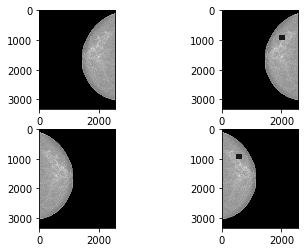

In [21]:
# Choose one to see whether it is correct.
# Status: Pass
# Possible problem: Integer or Float?

flip_image = Image.open(r'D:\Studying\RetinaNet_Project_test_agumentations\training_augmentations\Horizontal_flip\53581460\temp_dicom_53581460_horizontal_flip.tif')
flip_image = np.array(flip_image)
original_dicom = dicom.dcmread(image_path_list[10])
original_data = original_dicom.pixel_array

flip_from_original = original_data[:,::-1]
print(flip_image == flip_from_original)
print(flip_image[2500, 1700] == flip_from_original[2500, 1700])

plt.figure(1)

# Plot flipped image
plt.subplot2grid((2,2), (0,0))
plt.imshow(original_data, cmap='gray')
plt.subplot2grid((2,2), (0,1))
cv2.rectangle(original_data, (int(bbox_coordinates_array[10,0]), int(bbox_coordinates_array[10,1])),(int(bbox_coordinates_array[10,2]), int(bbox_coordinates_array[10,3])),(255,0,0),-1)
plt.imshow(original_data, cmap='gray')

# Plot its corresponding bbox
plt.subplot2grid((2,2),(1,0))
plt.imshow(flip_image, cmap='gray')
plt.subplot2grid((2,2),(1,1))
# cv2.rectangle(flip_image,(int(bbox_coordinates_horizontal_flip[6,0]),int(bbox_coordinates_horizontal_flip[6,1])),(int(bbox_coordinates_horizontal_flip[6,2]), int(bbox_coordinates_horizontal_flip[6,3])) , (255,0,0), -1)
cv2.rectangle(flip_image,(480, 838),(656, 1003) , (255,0,0), -1)
plt.imshow(flip_image, cmap='gray')

